In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import streamlit as st
import os

In [60]:
# Charger les données
data_2015 = pd.read_csv("/Users/skye/folder_happiness_csv/World_Happiness_2015.csv")
data_2016 = pd.read_csv("/Users/skye/folder_happiness_csv/World_Happiness_2016.csv")
data_2017 = pd.read_csv("/Users/skye/folder_happiness_csv/World_Happiness_2017.csv")
data_2018 = pd.read_csv("/Users/skye/folder_happiness_csv/World_Happiness_2018.csv")
data_2019 = pd.read_csv("/Users/skye/folder_happiness_csv/World_Happiness_2019.csv")

In [61]:
# Afficher un aperçu des données
data_2015.head(3)

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204


In [62]:
data_2016.head(3)

,Country,Region,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Denmark,Western Europe,1,7.526,7.460,7.592,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171,2.73939
1,Switzerland,Western Europe,2,7.509,7.428,7.590,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083,2.69463
2,Iceland,Western Europe,3,7.501,7.333,7.669,1.42666,1.18326,0.86733,0.56624,0.14975,0.47678,2.83137


In [63]:
data_2017.head(3)

,Country,Happiness.Rank,Happiness.Score,Whisker.high,Whisker.low,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual
0,Norway,1,7.537,7.594445,7.479556,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027
1,Denmark,2,7.522,7.581728,7.462272,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707
2,Iceland,3,7.504,7.622030,7.385970,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715


In [64]:
data_2018.head(3)

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.632,1.305,1.592,0.874,0.681,0.202,0.393
1,2,Norway,7.594,1.456,1.582,0.861,0.686,0.286,0.340
2,3,Denmark,7.555,1.351,1.590,0.868,0.683,0.284,0.408


In [66]:
data_2019.head(3)

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341


In [67]:
# Renommer les colonnes pour uniformiser
rename_2015 = {
    "Happiness Rank": "Happiness Rank",
    "Happiness Score": "Happiness Score",
    "Economy (GDP per Capita)": "Economy GPD",
    "Health (Life Expectancy)": "Life Expectancy",
    "Trust (Government Corruption)": "Government Corruption",
    "Lower Confidence Interval": "Lower CI",
    "Upper Confidence Interval": "Upper CI",
    "Family": "Social Support",
    "Freedom": "Freedom",
    "Generosity": "Generosity",
    "Dystopia Residual": "Dystopia Residual",
}
rename_2016 = {
    "Happiness Rank": "Happiness Rank",
    "Happiness Score": "Happiness Score",
    "Economy (GDP per Capita)": "Economy GPD",
    "Health (Life Expectancy)": "Life Expectancy",
    "Trust (Government Corruption)": "Government Corruption",
    "Lower Confidence Interval": "Lower CI",
    "Upper Confidence Interval": "Upper CI",
    "Family": "Social Support",
    "Freedom": "Freedom",
    "Generosity": "Generosity",
    "Dystopia Residual": "Dystopia Residual",
}

rename_2017 = {
    "Happiness.Rank":"Happiness Rank",
    "Happiness.Score": "Happiness Score",
    "Economy..GDP.per.Capita.": "Economy GPD",
    "Health..Life.Expectancy.": "Life Expectancy",
    "Trust..Government.Corruption.": "Government Corruption",
    "Family": "Social Support",
    "Dystopia.Residual": "Dystopia Residual",
    "Whisker.high":"Whisker high",
    "Whisker.low":"Whisker low",

}

rename_2018 = {
    "Overall rank": "Happiness Rank",
    "Score": "Happiness Score",
    "GDP per capita": "Economy GPD",
    "Healthy life expectancy": "Life Expectancy",
    "Perceptions of corruption": "Government Corruption",
    "Social support": "Social Support",
    "Freedom to make life choices": "Freedom",
    "Country or region": "Country",
}
rename_2019 = {
    "Overall rank": "Happiness Rank",
    "Score": "Happiness Score",
    "GDP per capita": "Economy GPD",
    "Healthy life expectancy": "Life Expectancy",
    "Perceptions of corruption": "Government Corruption",
    "Social support": "Social Support",
    "Freedom to make life choices": "Freedom",
    "Country or region": "Country",
}

In [68]:
# Appliquer les renommages
data_2015.rename(columns=rename_2015, inplace=True)
data_2016.rename(columns=rename_2016, inplace=True)
data_2017.rename(columns=rename_2017, inplace=True)
data_2018.rename(columns=rename_2018, inplace=True)
data_2019.rename(columns=rename_2019, inplace=True)

In [69]:
data_2015.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy GPD,Social Support,Life Expectancy,Freedom,Government Corruption,Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [70]:
data_2016.head()

,Country,Region,Happiness Rank,Happiness Score,Lower CI,Upper CI,Economy GPD,Social Support,Life Expectancy,Freedom,Government Corruption,Generosity,Dystopia Residual
0,Denmark,Western Europe,1,7.526,7.460,7.592,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171,2.73939
1,Switzerland,Western Europe,2,7.509,7.428,7.590,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083,2.69463
2,Iceland,Western Europe,3,7.501,7.333,7.669,1.42666,1.18326,0.86733,0.56624,0.14975,0.47678,2.83137
3,Norway,Western Europe,4,7.498,7.421,7.575,1.57744,1.12690,0.79579,0.59609,0.35776,0.37895,2.66465
4,Finland,Western Europe,5,7.413,7.351,7.475,1.40598,1.13464,0.81091,0.57104,0.41004,0.25492,2.82596


In [71]:
data_2017.head()

,Country,Happiness Rank,Happiness Score,Whisker high,Whisker low,Economy GPD,Social Support,Life Expectancy,Freedom,Generosity,Government Corruption,Dystopia Residual
0,Norway,1,7.537,7.594445,7.479556,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027
1,Denmark,2,7.522,7.581728,7.462272,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707
2,Iceland,3,7.504,7.622030,7.385970,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715
3,Switzerland,4,7.494,7.561772,7.426227,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716
4,Finland,5,7.469,7.527542,7.410458,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182


In [72]:
data_2018.head()

,Happiness Rank,Country,Happiness Score,Economy GPD,Social Support,Life Expectancy,Freedom,Generosity,Government Corruption
0,1,Finland,7.632,1.305,1.592,0.874,0.681,0.202,0.393
1,2,Norway,7.594,1.456,1.582,0.861,0.686,0.286,0.340
2,3,Denmark,7.555,1.351,1.590,0.868,0.683,0.284,0.408
3,4,Iceland,7.495,1.343,1.644,0.914,0.677,0.353,0.138
4,5,Switzerland,7.487,1.420,1.549,0.927,0.660,0.256,0.357


In [73]:
data_2019.head()

,Happiness Rank,Country,Happiness Score,Economy GPD,Social Support,Life Expectancy,Freedom,Generosity,Government Corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


In [74]:
# Add a 'Year' column to each dataset
data_2015['Year'] = 2015
data_2016['Year'] = 2016
data_2017['Year'] = 2017
data_2018['Year'] = 2018
data_2019['Year'] = 2019

# Find common columns
common_columns = set(data_2015.columns) & set(data_2016.columns) & set(data_2017.columns) & set(data_2018.columns)& set(data_2019.columns)

# Select only the common columns
data_2015_common = data_2015[list(common_columns)]
data_2016_common = data_2016[list(common_columns)]
data_2017_common = data_2017[list(common_columns)]
data_2018_common = data_2018[list(common_columns)]
data_2019_common = data_2019[list(common_columns)]

In [75]:
data_2015_common

,Social Support,Happiness Score,Happiness Rank,Year,Country,Life Expectancy,Generosity,Economy GPD,Government Corruption,Freedom
0,1.34951,7.587,1,2015,Switzerland,0.94143,0.29678,1.39651,0.41978,0.66557
1,1.40223,7.561,2,2015,Iceland,0.94784,0.43630,1.30232,0.14145,0.62877
2,1.36058,7.527,3,2015,Denmark,0.87464,0.34139,1.32548,0.48357,0.64938
3,1.33095,7.522,4,2015,Norway,0.88521,0.34699,1.45900,0.36503,0.66973
4,1.32261,7.427,5,2015,Canada,0.90563,0.45811,1.32629,0.32957,0.63297
...,...,...,...,...,...,...,...,...,...,...
153,0.77370,3.465,154,2015,Rwanda,0.42864,0.22628,0.22208,0.55191,0.59201
154,0.35386,3.340,155,2015,Benin,0.31910,0.18260,0.28665,0.08010,0.48450
155,0.47489,3.006,156,2015,Syria,0.72193,0.47179,0.66320,0.18906,0.15684
156,0.41587,2.905,157,2015,Burundi,0.22396,0.19727,0.01530,0.10062,0.11850


In [76]:
data_2016_common

,Social Support,Happiness Score,Happiness Rank,Year,Country,Life Expectancy,Generosity,Economy GPD,Government Corruption,Freedom
0,1.16374,7.526,1,2016,Denmark,0.79504,0.36171,1.44178,0.44453,0.57941
1,1.14524,7.509,2,2016,Switzerland,0.86303,0.28083,1.52733,0.41203,0.58557
2,1.18326,7.501,3,2016,Iceland,0.86733,0.47678,1.42666,0.14975,0.56624
3,1.12690,7.498,4,2016,Norway,0.79579,0.37895,1.57744,0.35776,0.59609
4,1.13464,7.413,5,2016,Finland,0.81091,0.25492,1.40598,0.41004,0.57104
...,...,...,...,...,...,...,...,...,...,...
152,0.10419,3.484,153,2016,Benin,0.21028,0.20180,0.39499,0.06681,0.39747
153,0.11037,3.360,154,2016,Afghanistan,0.17344,0.31268,0.38227,0.07112,0.16430
154,0.00000,3.303,155,2016,Togo,0.24811,0.17517,0.28123,0.11587,0.34678
155,0.14866,3.069,156,2016,Syria,0.62994,0.48397,0.74719,0.17233,0.06912


In [77]:
data_2017_common

,Social Support,Happiness Score,Happiness Rank,Year,Country,Life Expectancy,Generosity,Economy GPD,Government Corruption,Freedom
0,1.533524,7.537,1,2017,Norway,0.796667,0.362012,1.616463,0.315964,0.635423
1,1.551122,7.522,2,2017,Denmark,0.792566,0.355280,1.482383,0.400770,0.626007
2,1.610574,7.504,3,2017,Iceland,0.833552,0.475540,1.480633,0.153527,0.627163
3,1.516912,7.494,4,2017,Switzerland,0.858131,0.290549,1.564980,0.367007,0.620071
4,1.540247,7.469,5,2017,Finland,0.809158,0.245483,1.443572,0.382612,0.617951
...,...,...,...,...,...,...,...,...,...,...
150,0.945707,3.471,151,2017,Rwanda,0.326425,0.252756,0.368746,0.455220,0.581844
151,0.396103,3.462,152,2017,Syria,0.500533,0.493664,0.777153,0.151347,0.081539
152,1.041990,3.349,153,2017,Tanzania,0.364509,0.354256,0.511136,0.066035,0.390018
153,0.629794,2.905,154,2017,Burundi,0.151611,0.204435,0.091623,0.084148,0.059901


In [78]:
data_2018_common

,Social Support,Happiness Score,Happiness Rank,Year,Country,Life Expectancy,Generosity,Economy GPD,Government Corruption,Freedom
0,1.592,7.632,1,2018,Finland,0.874,0.202,1.305,0.393,0.681
1,1.582,7.594,2,2018,Norway,0.861,0.286,1.456,0.340,0.686
2,1.590,7.555,3,2018,Denmark,0.868,0.284,1.351,0.408,0.683
3,1.644,7.495,4,2018,Iceland,0.914,0.353,1.343,0.138,0.677
4,1.549,7.487,5,2018,Switzerland,0.927,0.256,1.420,0.357,0.660
...,...,...,...,...,...,...,...,...,...,...
151,1.073,3.355,152,2018,Yemen,0.343,0.083,0.442,0.064,0.244
152,0.991,3.303,153,2018,Tanzania,0.381,0.270,0.455,0.097,0.481
153,0.608,3.254,154,2018,South Sudan,0.177,0.224,0.337,0.106,0.112
154,0.000,3.083,155,2018,Central African Republic,0.010,0.218,0.024,0.038,0.305


In [79]:
data_2019_common

,Social Support,Happiness Score,Happiness Rank,Year,Country,Life Expectancy,Generosity,Economy GPD,Government Corruption,Freedom
0,1.587,7.769,1,2019,Finland,0.986,0.153,1.340,0.393,0.596
1,1.573,7.600,2,2019,Denmark,0.996,0.252,1.383,0.410,0.592
2,1.582,7.554,3,2019,Norway,1.028,0.271,1.488,0.341,0.603
3,1.624,7.494,4,2019,Iceland,1.026,0.354,1.380,0.118,0.591
4,1.522,7.488,5,2019,Netherlands,0.999,0.322,1.396,0.298,0.557
...,...,...,...,...,...,...,...,...,...,...
151,0.711,3.334,152,2019,Rwanda,0.614,0.217,0.359,0.411,0.555
152,0.885,3.231,153,2019,Tanzania,0.499,0.276,0.476,0.147,0.417
153,0.517,3.203,154,2019,Afghanistan,0.361,0.158,0.350,0.025,0.000
154,0.000,3.083,155,2019,Central African Republic,0.105,0.235,0.026,0.035,0.225


In [80]:
# Combine the datasets
combined_data = pd.concat([data_2015_common, data_2016_common, data_2017_common, data_2018_common, data_2019_common], ignore_index=True)

# Check the combined data
print(combined_data.head())

   Social Support  Happiness Score  Happiness Rank  Year      Country  \
0         1.34951            7.587               1  2015  Switzerland   
1         1.40223            7.561               2  2015      Iceland   
2         1.36058            7.527               3  2015      Denmark   
3         1.33095            7.522               4  2015       Norway   
4         1.32261            7.427               5  2015       Canada   

   Life Expectancy  Generosity  Economy GPD  Government Corruption  Freedom  
0          0.94143     0.29678      1.39651                0.41978  0.66557  
1          0.94784     0.43630      1.30232                0.14145  0.62877  
2          0.87464     0.34139      1.32548                0.48357  0.64938  
3          0.88521     0.34699      1.45900                0.36503  0.66973  
4          0.90563     0.45811      1.32629                0.32957  0.63297  


In [81]:
# Check the combined data
combined_data.head()

,Social Support,Happiness Score,Happiness Rank,Year,Country,Life Expectancy,Generosity,Economy GPD,Government Corruption,Freedom
0,1.34951,7.587,1,2015,Switzerland,0.94143,0.29678,1.39651,0.41978,0.66557
1,1.40223,7.561,2,2015,Iceland,0.94784,0.43630,1.30232,0.14145,0.62877
2,1.36058,7.527,3,2015,Denmark,0.87464,0.34139,1.32548,0.48357,0.64938
3,1.33095,7.522,4,2015,Norway,0.88521,0.34699,1.45900,0.36503,0.66973
4,1.32261,7.427,5,2015,Canada,0.90563,0.45811,1.32629,0.32957,0.63297


In [82]:
combined_data.tail()

,Social Support,Happiness Score,Happiness Rank,Year,Country,Life Expectancy,Generosity,Economy GPD,Government Corruption,Freedom
777,0.711,3.334,152,2019,Rwanda,0.614,0.217,0.359,0.411,0.555
778,0.885,3.231,153,2019,Tanzania,0.499,0.276,0.476,0.147,0.417
779,0.517,3.203,154,2019,Afghanistan,0.361,0.158,0.350,0.025,0.000
780,0.000,3.083,155,2019,Central African Republic,0.105,0.235,0.026,0.035,0.225
781,0.575,2.853,156,2019,South Sudan,0.295,0.202,0.306,0.091,0.010


In [83]:
# Group by year and calculate mean only for numeric columns
yearly_summary = combined_data.groupby('Year').mean(numeric_only=True)
print(yearly_summary)

      Social Support  Happiness Score  Happiness Rank  Life Expectancy  \
Year                                                                     
2015        0.991046         5.375734       79.493671         0.630259   
2016        0.793621         5.382185       78.980892         0.557619   
2017        1.188898         5.354019       78.000000         0.551341   
2018        1.213237         5.375917       78.500000         0.597346   
2019        1.208814         5.407096       78.500000         0.725244   

      Generosity  Economy GPD  Government Corruption   Freedom  
Year                                                            
2015    0.237296     0.846137               0.143422  0.428615  
2016    0.242635     0.953880               0.137624  0.370994  
2017    0.246883     0.984718               0.123120  0.408786  
2018    0.181006     0.891449               0.112000  0.454506  
2019    0.184846     0.905147               0.110603  0.392571  


In [84]:
# Compare GDP and Life Expectancy across years
comparison = combined_data.groupby('Year')[['Economy GPD', 'Life Expectancy']].mean()
print(comparison)

      Economy GPD  Life Expectancy
Year                              
2015     0.846137         0.630259
2016     0.953880         0.557619
2017     0.984718         0.551341
2018     0.891449         0.597346
2019     0.905147         0.725244


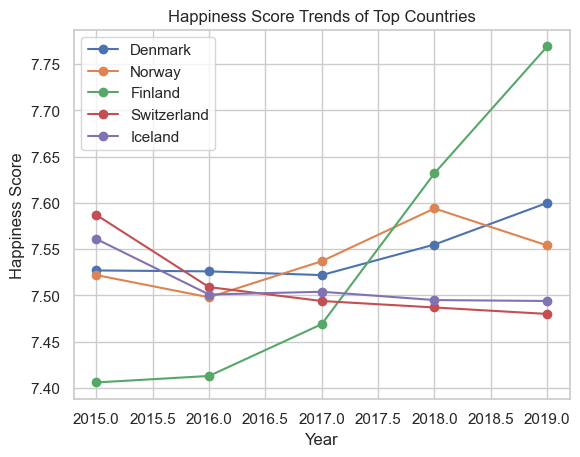

In [85]:
import matplotlib.pyplot as plt

# Group by 'Country' and calculate the average Happiness Score
country_avg_happiness = combined_data.groupby('Country')['Happiness Score'].mean()

# Sort countries by Happiness Score in descending order and get the top 5
top_countries = country_avg_happiness.sort_values(ascending=False).head(5).index.tolist()

# Filter the data for the top countries
filtered_data = combined_data[combined_data['Country'].isin(top_countries)]

# Use .loc to safely modify the columns
filtered_data.loc[:, 'Year'] = pd.to_numeric(filtered_data['Year'], errors='coerce')
filtered_data.loc[:, 'Happiness Score'] = pd.to_numeric(filtered_data['Happiness Score'], errors='coerce')

# Remove rows with missing values
filtered_data = filtered_data.dropna(subset=['Year', 'Happiness Score'])

# Plot Happiness Score trends for the top countries
for country in top_countries:
    country_data = filtered_data[filtered_data['Country'] == country]
    plt.plot(country_data['Year'], country_data['Happiness Score'], marker='o', label=country)

plt.title('Happiness Score Trends of Top Countries')
plt.xlabel('Year')
plt.ylabel('Happiness Score')
plt.legend()
plt.grid(True)
plt.show()


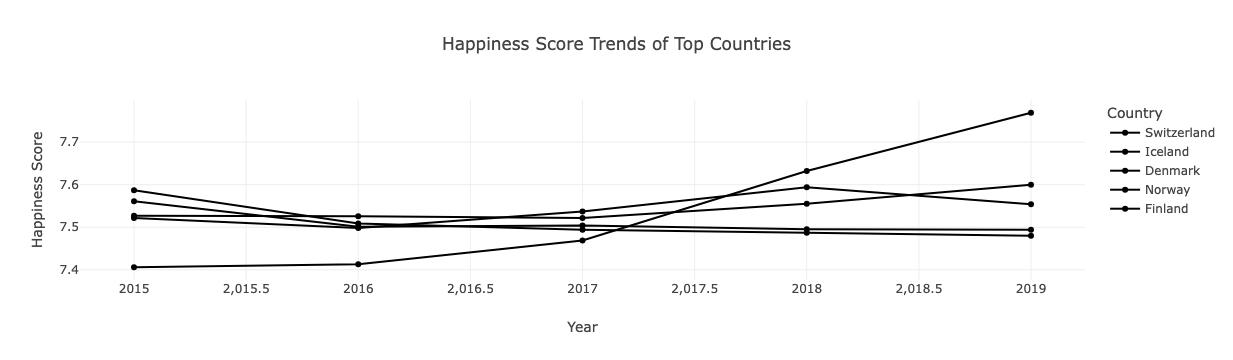

In [86]:
import plotly.express as px

# Group by 'Country' and calculate the average Happiness Score
country_avg_happiness = combined_data.groupby('Country')['Happiness Score'].mean()

# Sort countries by Happiness Score in descending order and get the top 5
top_countries = country_avg_happiness.sort_values(ascending=False).head(5).index.tolist()

# Filter the data for the top countries
filtered_data = combined_data[combined_data['Country'].isin(top_countries)]

# Use .loc to safely modify the columns
filtered_data.loc[:, 'Year'] = pd.to_numeric(filtered_data['Year'], errors='coerce')
filtered_data.loc[:, 'Happiness Score'] = pd.to_numeric(filtered_data['Happiness Score'], errors='coerce')

# Remove rows with missing values
filtered_data = filtered_data.dropna(subset=['Year', 'Happiness Score'])

# Plot Happiness Score trends for the top countries
fig = px.line(filtered_data, x='Year', y='Happiness Score', color='Country', markers=True,
              title='Happiness Score Trends of Top Countries')

# Show the plot
fig.show()

In [87]:
combined_data.to_csv('combined_data.csv', index=False)

In [88]:
data = pd.read_csv("combined_data.csv")
data

,Social Support,Happiness Score,Happiness Rank,Year,Country,Life Expectancy,Generosity,Economy GPD,Government Corruption,Freedom
0,1.34951,7.587,1,2015,Switzerland,0.94143,0.29678,1.39651,0.41978,0.66557
1,1.40223,7.561,2,2015,Iceland,0.94784,0.43630,1.30232,0.14145,0.62877
2,1.36058,7.527,3,2015,Denmark,0.87464,0.34139,1.32548,0.48357,0.64938
3,1.33095,7.522,4,2015,Norway,0.88521,0.34699,1.45900,0.36503,0.66973
4,1.32261,7.427,5,2015,Canada,0.90563,0.45811,1.32629,0.32957,0.63297
...,...,...,...,...,...,...,...,...,...,...
777,0.71100,3.334,152,2019,Rwanda,0.61400,0.21700,0.35900,0.41100,0.55500
778,0.88500,3.231,153,2019,Tanzania,0.49900,0.27600,0.47600,0.14700,0.41700
779,0.51700,3.203,154,2019,Afghanistan,0.36100,0.15800,0.35000,0.02500,0.00000
780,0.00000,3.083,155,2019,Central African Republic,0.10500,0.23500,0.02600,0.03500,0.22500


In [89]:
# Display the first few rows of the dataset
data.head()

,Social Support,Happiness Score,Happiness Rank,Year,Country,Life Expectancy,Generosity,Economy GPD,Government Corruption,Freedom
0,1.34951,7.587,1,2015,Switzerland,0.94143,0.29678,1.39651,0.41978,0.66557
1,1.40223,7.561,2,2015,Iceland,0.94784,0.43630,1.30232,0.14145,0.62877
2,1.36058,7.527,3,2015,Denmark,0.87464,0.34139,1.32548,0.48357,0.64938
3,1.33095,7.522,4,2015,Norway,0.88521,0.34699,1.45900,0.36503,0.66973
4,1.32261,7.427,5,2015,Canada,0.90563,0.45811,1.32629,0.32957,0.63297


In [90]:
# Display basic information about the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 782 entries, 0 to 781
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Social Support         782 non-null    float64
 1   Happiness Score        782 non-null    float64
 2   Happiness Rank         782 non-null    int64  
 3   Year                   782 non-null    int64  
 4   Country                782 non-null    object 
 5   Life Expectancy        782 non-null    float64
 6   Generosity             782 non-null    float64
 7   Economy GPD            782 non-null    float64
 8   Government Corruption  781 non-null    float64
 9   Freedom                782 non-null    float64
dtypes: float64(7), int64(2), object(1)
memory usage: 61.2+ KB


In [91]:
# Check for missing values
missing_values = data.isnull().sum()
missing_values

Social Support           0
Happiness Score          0
Happiness Rank           0
Year                     0
Country                  0
Life Expectancy          0
Generosity               0
Economy GPD              0
Government Corruption    1
Freedom                  0
dtype: int64

In [92]:
# Remove rows with missing values in 'Government Corruption'
data = data.dropna(subset=['Government Corruption'])

# Verify that the missing value is removed
missing_values_cleaned = data.isnull().sum()
print(missing_values_cleaned)

Social Support           0
Happiness Score          0
Happiness Rank           0
Year                     0
Country                  0
Life Expectancy          0
Generosity               0
Economy GPD              0
Government Corruption    0
Freedom                  0
dtype: int64


In [93]:
# Check unique years in the dataset
print(data['Year'].unique())


[2015 2016 2017 2018 2019]


In [94]:
# Step 3: Exploratory Data Analysis (EDA)

import matplotlib.pyplot as plt
import seaborn as sns

# 1. Descriptive Statistics
print("Descriptive Statistics:")
print(data.describe())


Descriptive Statistics:
       Social Support  Happiness Score  Happiness Rank         Year  \
count      781.000000       781.000000      781.000000   781.000000   
mean         1.078780         5.377232       78.773367  2016.992318   
std          0.329581         1.127071       45.162398     1.417814   
min          0.000000         2.693000        1.000000  2015.000000   
25%          0.870210         4.509000       40.000000  2016.000000   
50%          1.125000         5.321000       79.000000  2017.000000   
75%          1.328000         6.182000      118.000000  2018.000000   
max          1.644000         7.769000      158.000000  2019.000000   

       Life Expectancy  Generosity  Economy GPD  Government Corruption  \
count       781.000000  781.000000   781.000000             781.000000   
mean          0.612342    0.218618     0.914537               0.125436   
std           0.248459    0.122394     0.405403               0.105816   
min           0.000000    0.000000     0

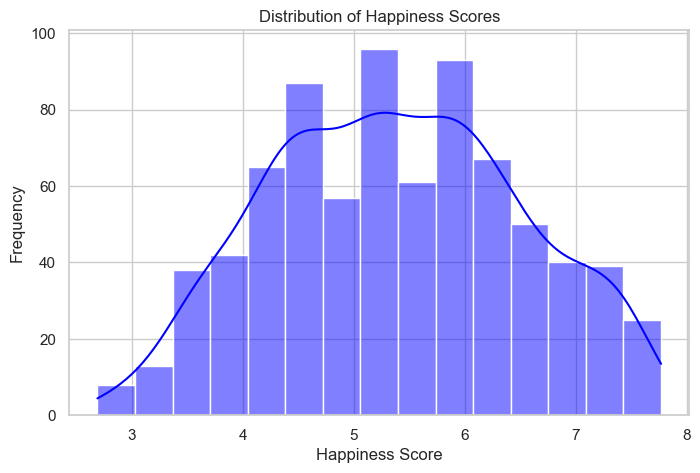

In [95]:

# 2. Distribution of Happiness Score
plt.figure(figsize=(8, 5))
sns.histplot(data['Happiness Score'], kde=True, bins=15, color='blue')
plt.title("Distribution of Happiness Scores")
plt.xlabel("Happiness Score")
plt.ylabel("Frequency")
plt.show()


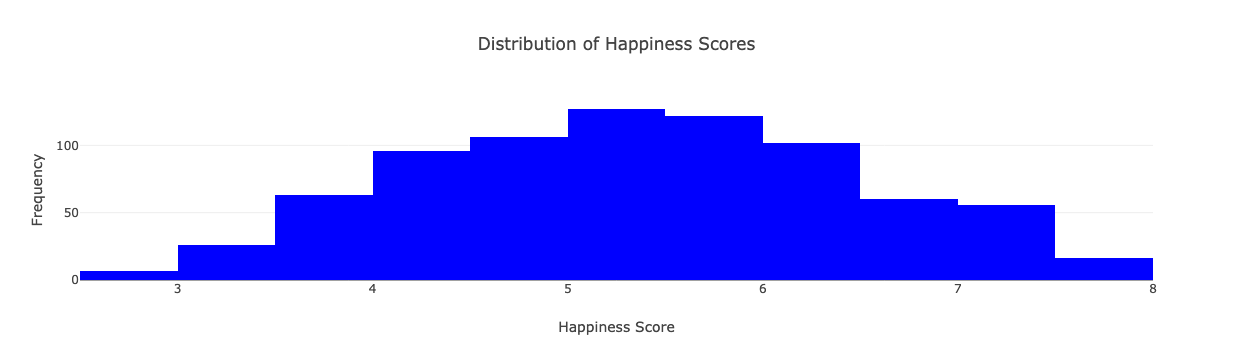

In [96]:
import plotly.express as px
import plotly.graph_objects as go

# 1. Distribution of Happiness Scores
fig1 = px.histogram(data, x='Happiness Score', nbins=15, title='Distribution of Happiness Scores', 
                    labels={'Happiness Score': 'Happiness Score'}, color_discrete_sequence=['blue'])
fig1.update_layout(xaxis_title='Happiness Score', yaxis_title='Frequency')
fig1.show()


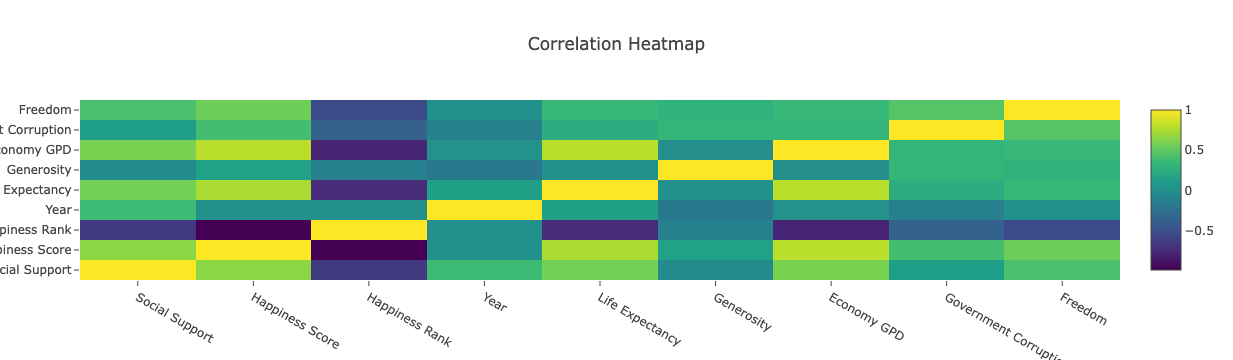

In [97]:

# 2. Correlation Heatmap
# Exclude non-numeric columns from correlation calculation
numeric_data = data.select_dtypes(include=['float64', 'int64'])
correlation_matrix = numeric_data.corr()

heatmap = go.Figure(data=go.Heatmap(
    z=correlation_matrix.values,
    x=correlation_matrix.columns,
    y=correlation_matrix.columns,
    colorscale='Viridis'
))
heatmap.update_layout(title="Correlation Heatmap")
heatmap.show()


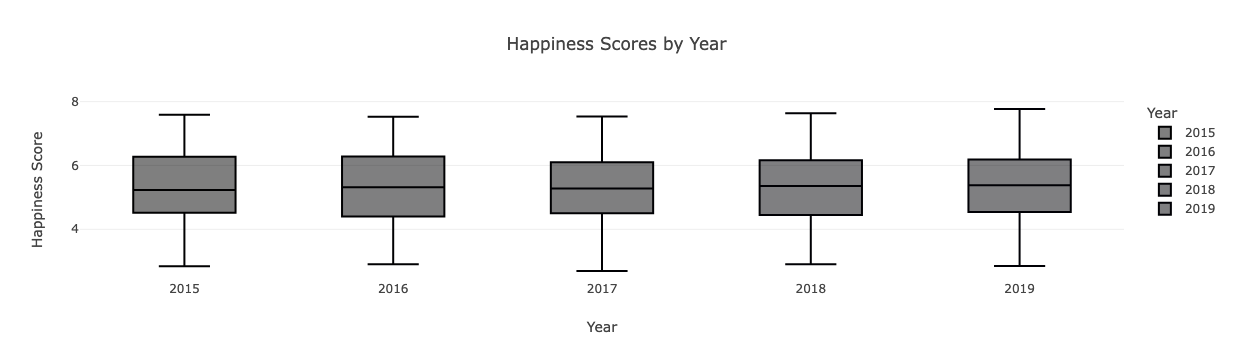

In [98]:

# 3. Happiness Score by Year (Boxplot)
fig2 = px.box(data, x='Year', y='Happiness Score', color='Year', 
              title='Happiness Scores by Year', 
              labels={'Happiness Score': 'Happiness Score', 'Year': 'Year'})
fig2.update_layout(xaxis_title='Year', yaxis_title='Happiness Score')
fig2.show()


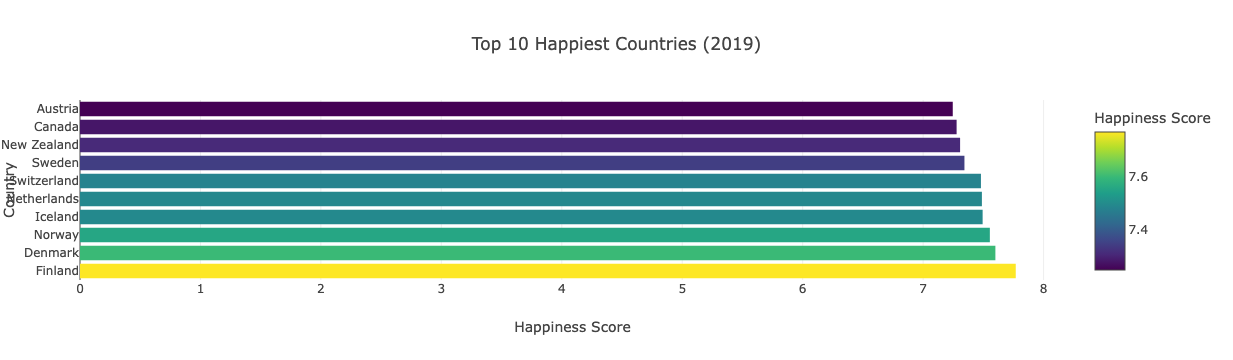

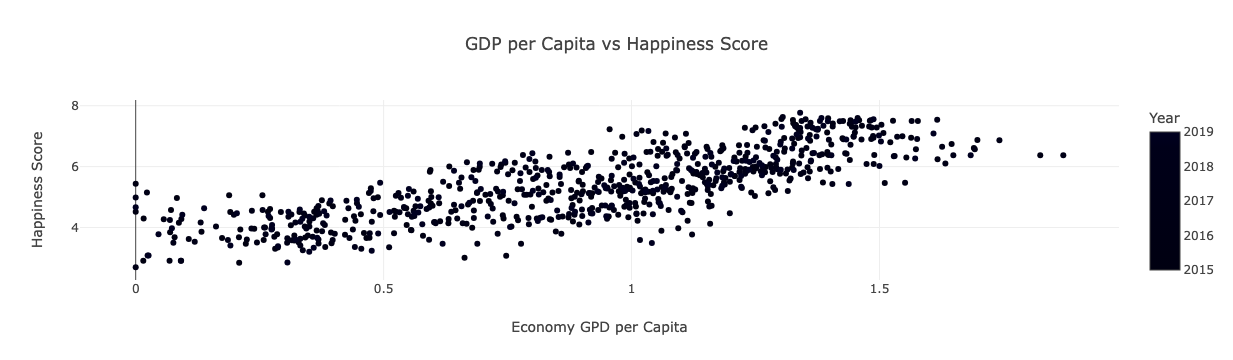

In [99]:

# 4. Top 10 Happiest Countries (Latest Year)
latest_year = data['Year'].max()
top_10 = data[data['Year'] == latest_year].sort_values(by='Happiness Score', ascending=False).head(10)
fig3 = px.bar(top_10, x='Happiness Score', y='Country', orientation='h', 
              title=f"Top 10 Happiest Countries ({latest_year})", 
              labels={'Happiness Score': 'Happiness Score', 'Country': 'Country'}, 
              color='Happiness Score', color_continuous_scale='viridis')
fig3.update_layout(xaxis_title='Happiness Score', yaxis_title='Country')
fig3.show()

# 5. Relationship Between GDP and Happiness Score
fig4 = px.scatter(data, x='Economy GPD', y='Happiness Score', color='Year', 
                  title='GDP per Capita vs Happiness Score', 
                  labels={'Economy GPD': 'Economy GPD per Capita', 'Happiness Score': 'Happiness Score'},
                  hover_data=['Country'])
fig4.update_layout(xaxis_title='Economy GPD per Capita', yaxis_title='Happiness Score')
fig4.show()


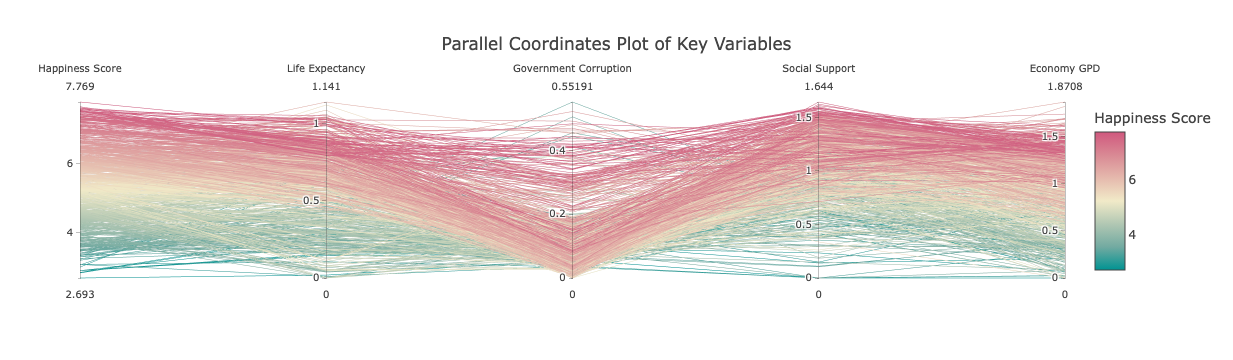

In [100]:

# 6. Parallel Coordinates Plot of Key Variables
key_variables = ['Happiness Score', 'Life Expectancy', 'Government Corruption', 'Social Support', 'Economy GPD']
fig5 = px.parallel_coordinates(data, dimensions=key_variables, 
                                color='Happiness Score', color_continuous_scale=px.colors.diverging.Tealrose, 
                                title="Parallel Coordinates Plot of Key Variables")
fig5.show()


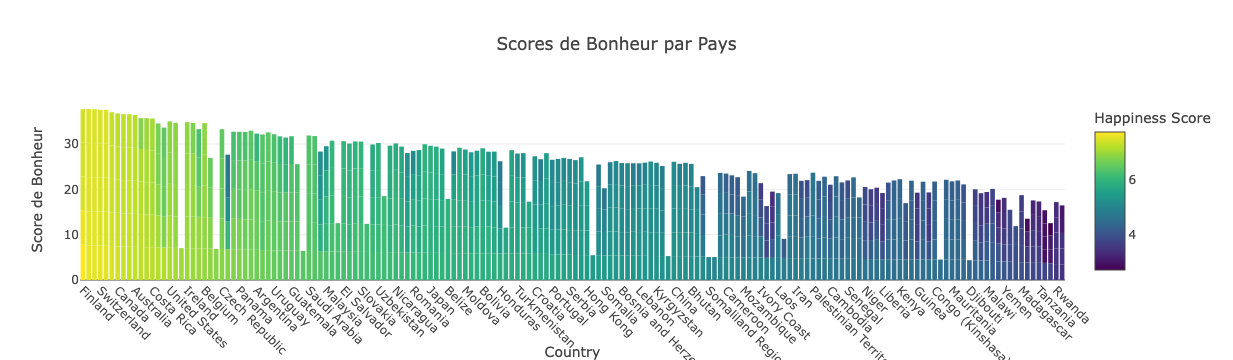

In [101]:
# Sort data by Happiness Score in descending order
data_sorted = data.sort_values('Happiness Score', ascending=False)

# Create the bar chart with color
fig4 = px.bar(data_sorted,
              x='Country', 
              y='Happiness Score', 
              color='Happiness Score',  # Color by Happiness Score
              title='Scores de Bonheur par Pays',
              color_continuous_scale='Viridis')  # Choose a color scale

# Update layout for better visualization
fig4.update_layout(yaxis_title='Score de Bonheur',
                   xaxis_tickangle=45)  # Rotate country labels for readability
fig4.show()

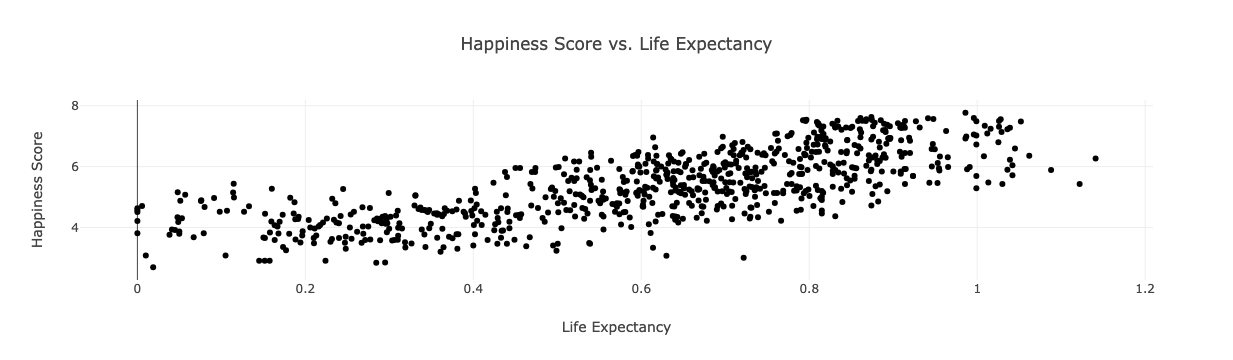

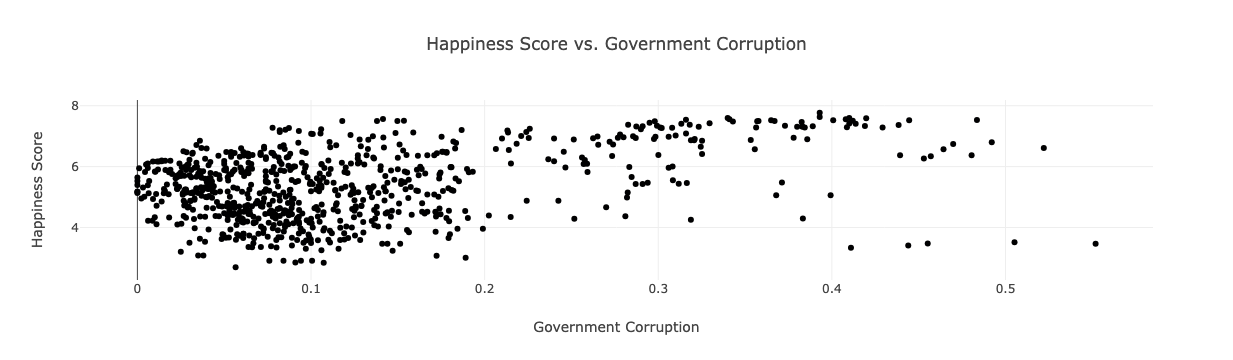

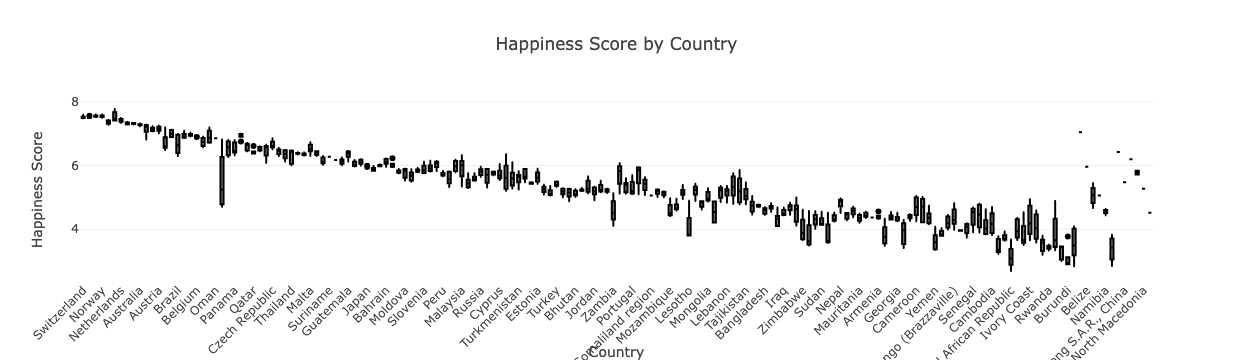

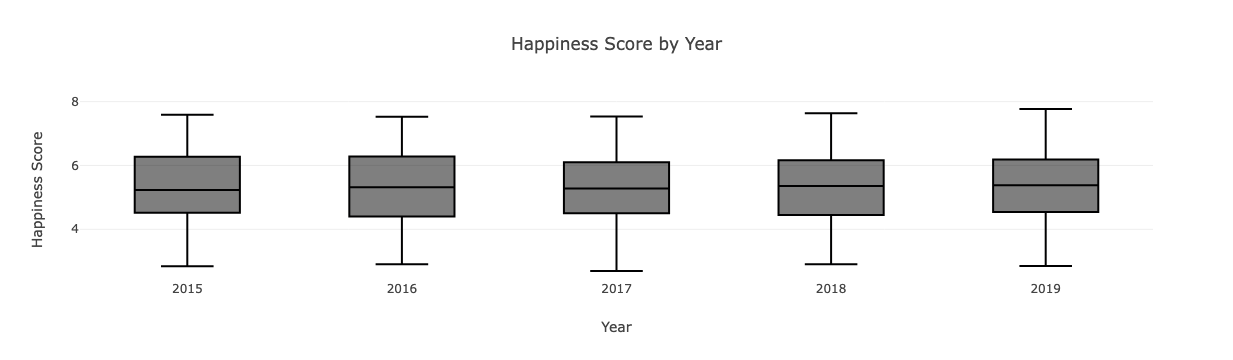

In [102]:
import plotly.express as px
import pandas as pd

# Assuming 'data' is your DataFrame containing the relevant columns
# Example DataFrame structure:
# data = pd.DataFrame({
#     'Country': [...],
#     'Happiness Score': [...],
#     'Life Expectancy': [...],
#     'Government Corruption': [...],
#     'Year': [...]
# })

# Scatter Plot: Happiness Score vs. Life Expectancy
fig1 = px.scatter(data, x='Life Expectancy', y='Happiness Score',
                  title='Happiness Score vs. Life Expectancy',
                  labels={'Life Expectancy': 'Life Expectancy', 'Happiness Score': 'Happiness Score'},
                  hover_name='Country')  # Show country name on hover
fig1.show()

# Scatter Plot: Happiness Score vs. Government Corruption
fig2 = px.scatter(data, x='Government Corruption', y='Happiness Score',
                  title='Happiness Score vs. Government Corruption',
                  labels={'Government Corruption': 'Government Corruption', 'Happiness Score': 'Happiness Score'},
                  hover_name='Country')  # Show country name on hover
fig2.show()

# Box Plot: Happiness Score by Country
fig3 = px.box(data, x='Country', y='Happiness Score',
              title='Happiness Score by Country',
              labels={'Country': 'Country', 'Happiness Score': 'Happiness Score'})
fig3.update_layout(xaxis_tickangle=-45)  # Rotate x-axis labels for better visibility
fig3.show()

# Box Plot: Happiness Score by Year
fig4 = px.box(data, x='Year', y='Happiness Score',
              title='Happiness Score by Year',
              labels={'Year': 'Year', 'Happiness Score': 'Happiness Score'})
fig4.show()


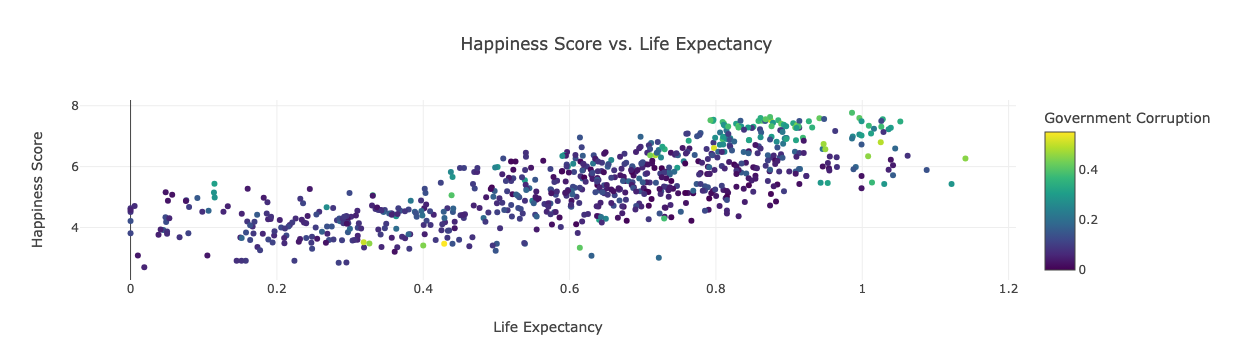

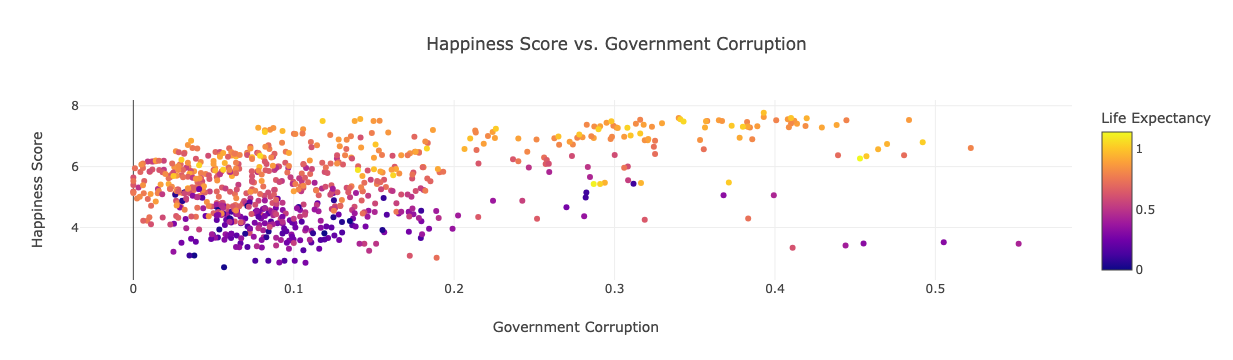

In [103]:
import plotly.express as px
import pandas as pd

# Example DataFrame structure:
# data = pd.DataFrame({
#     'Country': [...],
#     'Happiness Score': [...],
#     'Life Expectancy': [...],
#     'Government Corruption': [...],
#     'Year': [...]
# })

# Scatter Plot: Happiness Score vs. Life Expectancy with color by Government Corruption
fig1 = px.scatter(
    data, x='Life Expectancy', y='Happiness Score', color='Government Corruption',
    title='Happiness Score vs. Life Expectancy',
    labels={'Life Expectancy': 'Life Expectancy', 'Happiness Score': 'Happiness Score', 'Government Corruption': 'Government Corruption'},
    hover_name='Country',
    color_continuous_scale='Viridis'  # Optional: Change color scale
)
fig1.show()

# Scatter Plot: Happiness Score vs. Government Corruption with color by Life Expectancy
fig2 = px.scatter(
    data, x='Government Corruption', y='Happiness Score', color='Life Expectancy',
    title='Happiness Score vs. Government Corruption',
    labels={'Government Corruption': 'Government Corruption', 'Happiness Score': 'Happiness Score', 'Life Expectancy': 'Life Expectancy'},
    hover_name='Country',
    color_continuous_scale='Plasma'  # Optional: Change color scale
)
fig2.show()



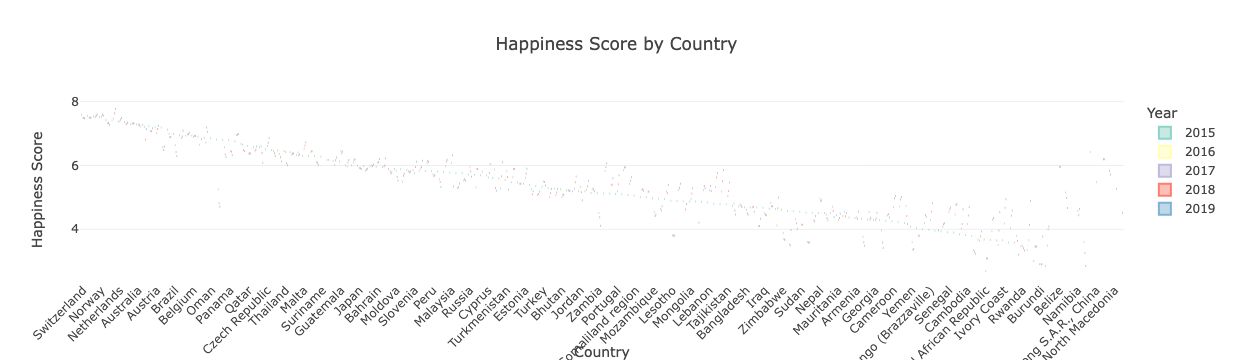

In [104]:
import plotly.express as px

# Box Plot: Happiness Score by Country with color by Year (discrete colors)
fig3 = px.box(
    data, x='Country', y='Happiness Score', color='Year',
    title='Happiness Score by Country',
    labels={'Country': 'Country', 'Happiness Score': 'Happiness Score'},
    color_discrete_sequence=px.colors.qualitative.Set3  # Set3 for distinct colors
)
fig3.update_layout(xaxis_tickangle=-45)  # Rotate x-axis labels for better visibility
fig3.show()


In [105]:
import plotly.express as px
from ipywidgets import widgets, interact

# Interactive function for year selection
def update_map(year):
    # Filter data for the selected year
    filtered_data = data[data['Year'] == year]
    
    # Create the choropleth map
    fig = px.choropleth(
        filtered_data,
        locations="Country",
        locationmode="country names",
        color="Happiness Score",
        hover_name="Country",
        color_continuous_scale="Blues",
        title=f"Happiness Score Across Countries in {year}"
    )
    
    # Show the map
    fig.show()

# Dropdown widget for year selection
year_selector = widgets.IntSlider(
    value=data['Year'].min(),
    min=data['Year'].min(),
    max=data['Year'].max(),
    step=1,
    description="Year:"
)

# Create an interactive map
interact(update_map, year=year_selector)


interactive(children=(IntSlider(value=2015, description='Year:', max=2019, min=2015), Output()), _dom_classes=…

<function __main__.update_map(year)>

In [106]:
data.to_csv('data.csv', index=False)

In [107]:
# Checking for missing values, data types, and summary statistics

# Missing values
missing_values = data.isnull().sum()

# Data types
data_types = data.dtypes

# Summary statistics
summary_stats = data.describe()

missing_values, data_types, summary_stats


(Social Support           0
 Happiness Score          0
 Happiness Rank           0
 Year                     0
 Country                  0
 Life Expectancy          0
 Generosity               0
 Economy GPD              0
 Government Corruption    0
 Freedom                  0
 dtype: int64,
 Social Support           float64
 Happiness Score          float64
 Happiness Rank             int64
 Year                       int64
 Country                   object
 Life Expectancy          float64
 Generosity               float64
 Economy GPD              float64
 Government Corruption    float64
 Freedom                  float64
 dtype: object,
        Social Support  Happiness Score  Happiness Rank         Year  \
 count      781.000000       781.000000      781.000000   781.000000   
 mean         1.078780         5.377232       78.773367  2016.992318   
 std          0.329581         1.127071       45.162398     1.417814   
 min          0.000000         2.693000        1.000000  2015

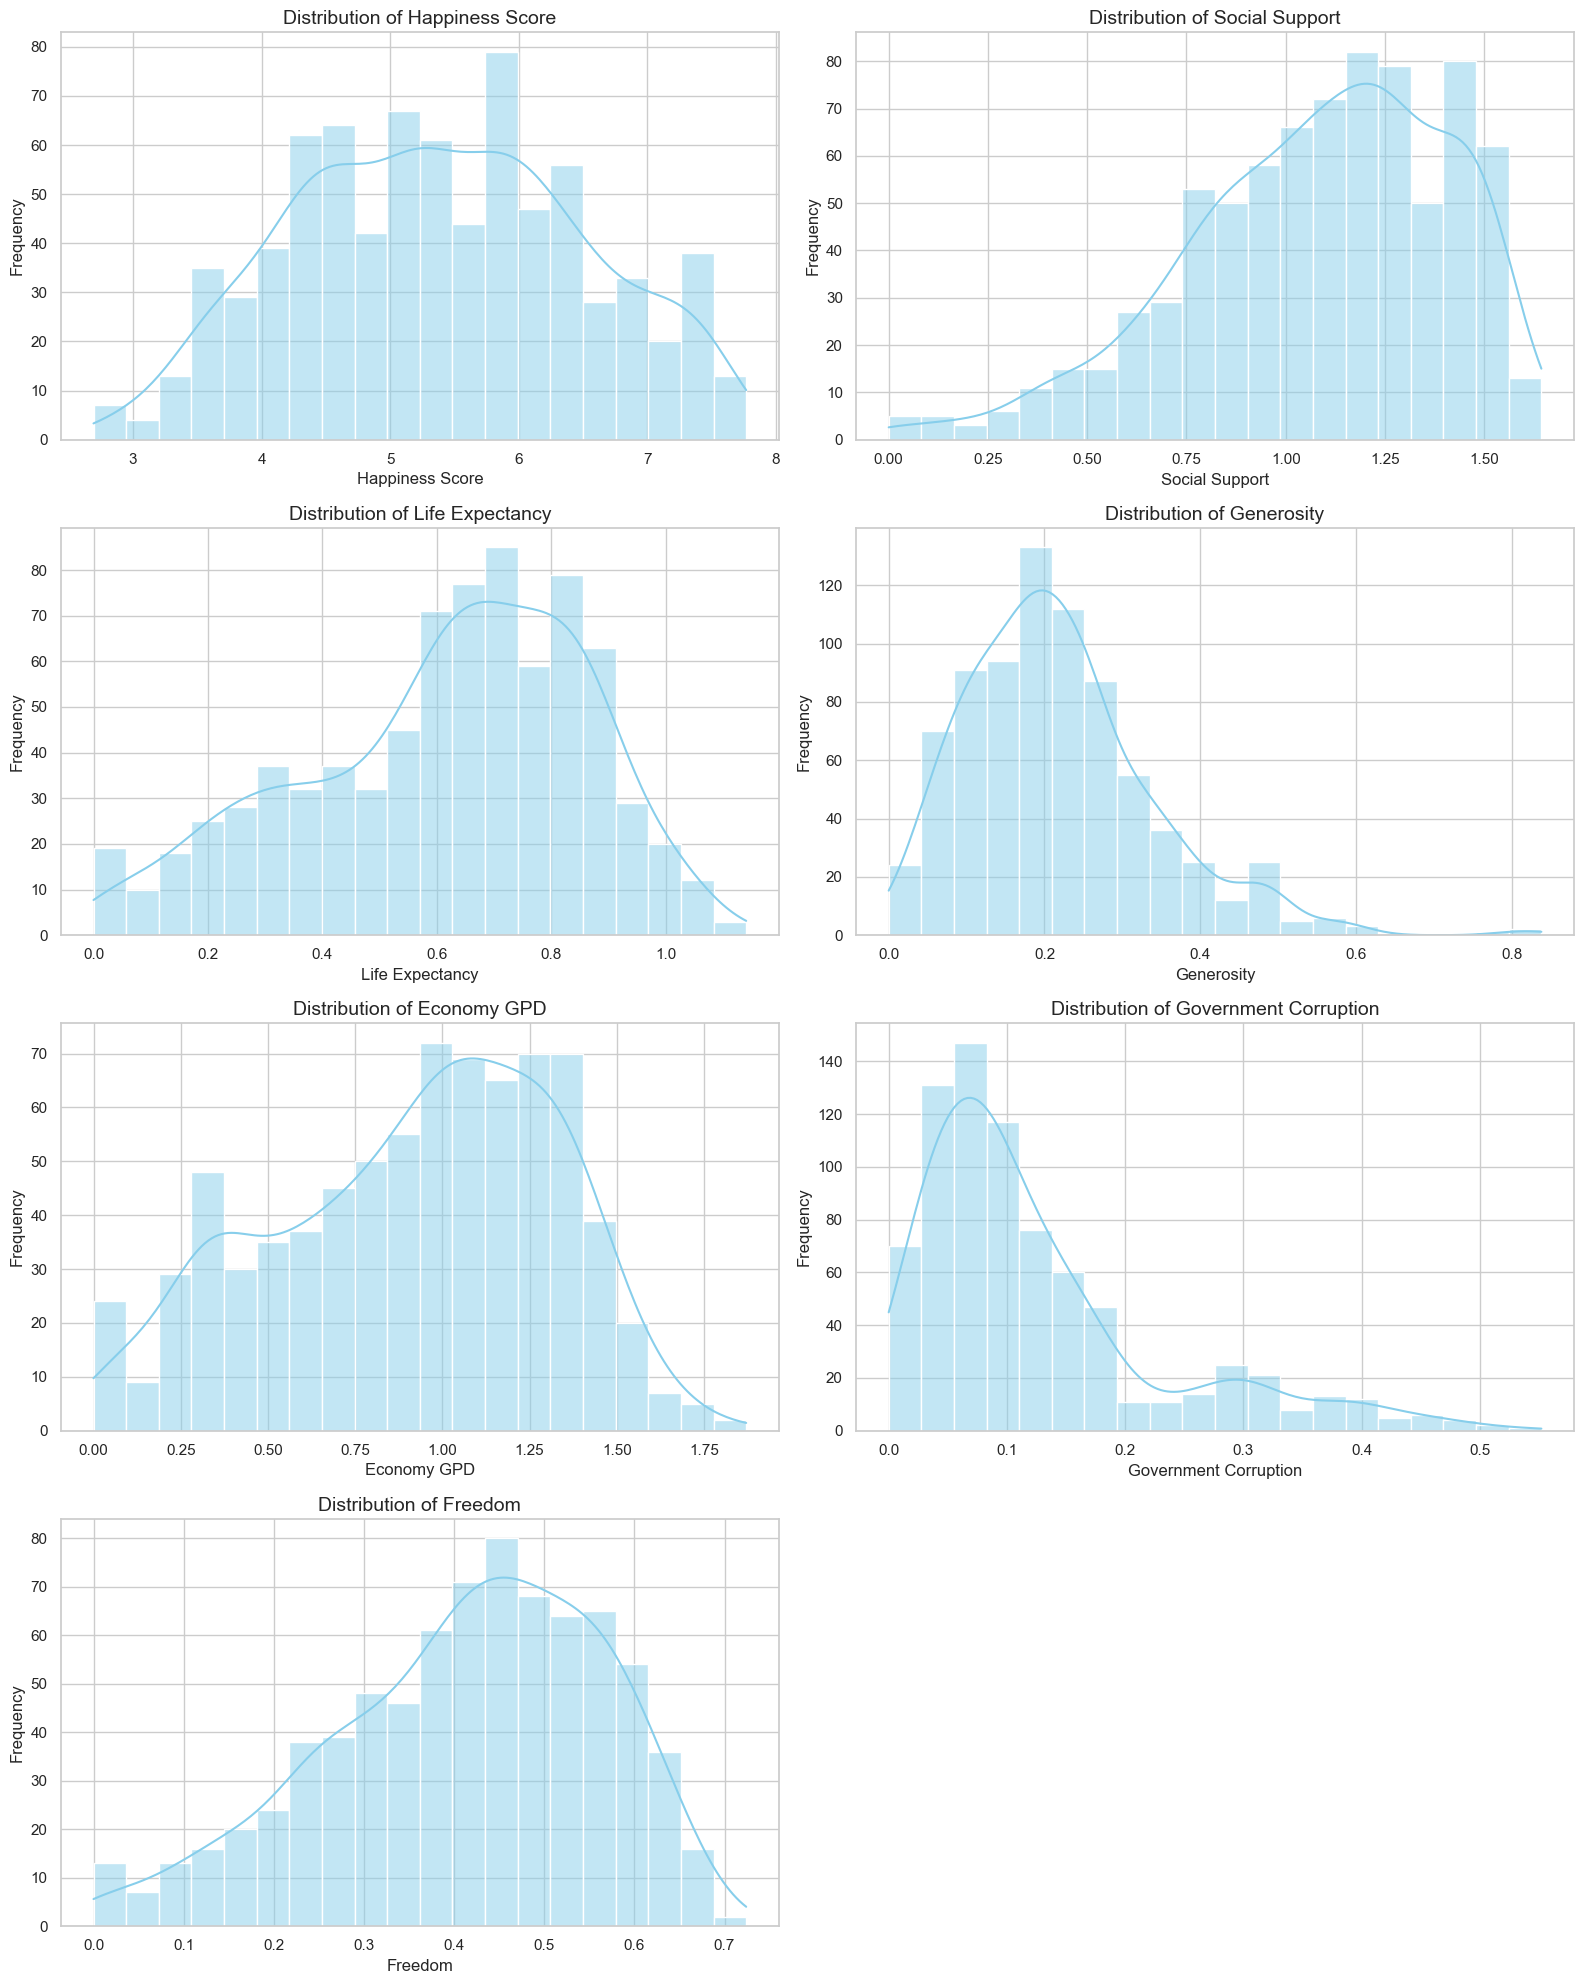

In [108]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set a consistent style for plots
sns.set(style="whitegrid")

# List of key variables for univariate analysis
key_variables = [
    "Happiness Score",
    "Social Support",
    "Life Expectancy",
    "Generosity",
    "Economy GPD",
    "Government Corruption",
    "Freedom"
]

# Plot distributions for each key variable
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(16, 20))
axes = axes.flatten()

for i, var in enumerate(key_variables):
    sns.histplot(data[var], kde=True, bins=20, ax=axes[i], color="skyblue")
    axes[i].set_title(f"Distribution of {var}", fontsize=14)
    axes[i].set_xlabel(var, fontsize=12)
    axes[i].set_ylabel("Frequency", fontsize=12)

# Hide any unused subplot axes
for j in range(len(key_variables), len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()


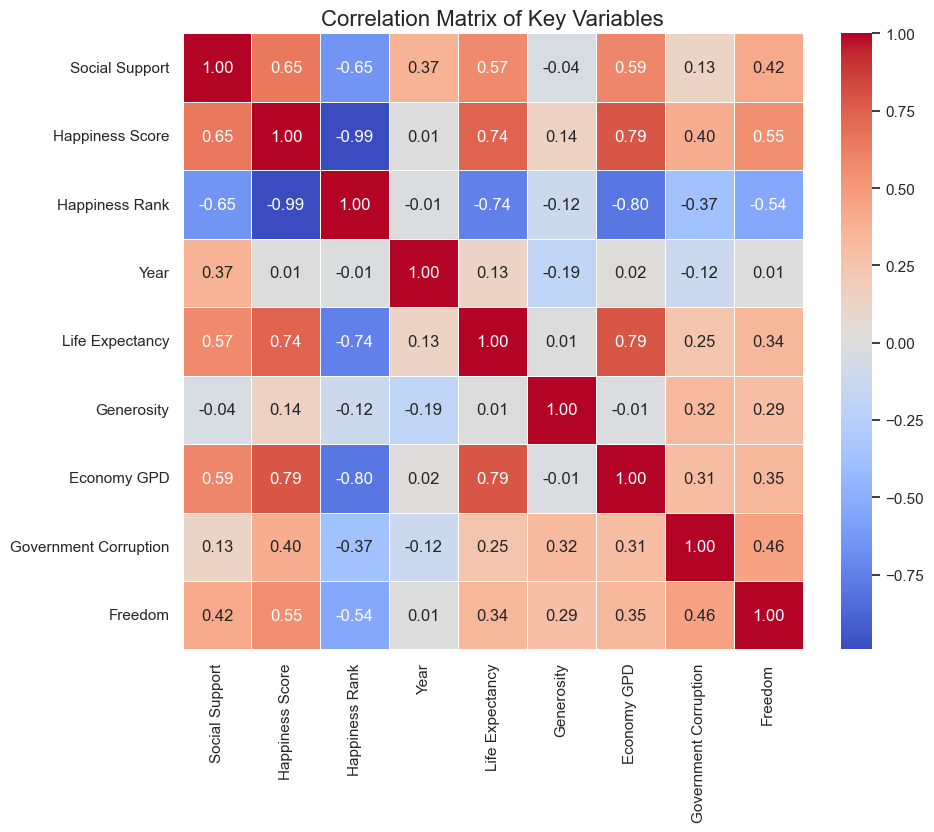

In [109]:
# Re-importing required libraries to ensure they are correctly loaded
import matplotlib.pyplot as plt
import seaborn as sns

# Recomputing the correlation matrix (handling future warning explicitly)
correlation_matrix = data.select_dtypes(include=['float64', 'int64']).corr()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix of Key Variables", fontsize=16)
plt.show()


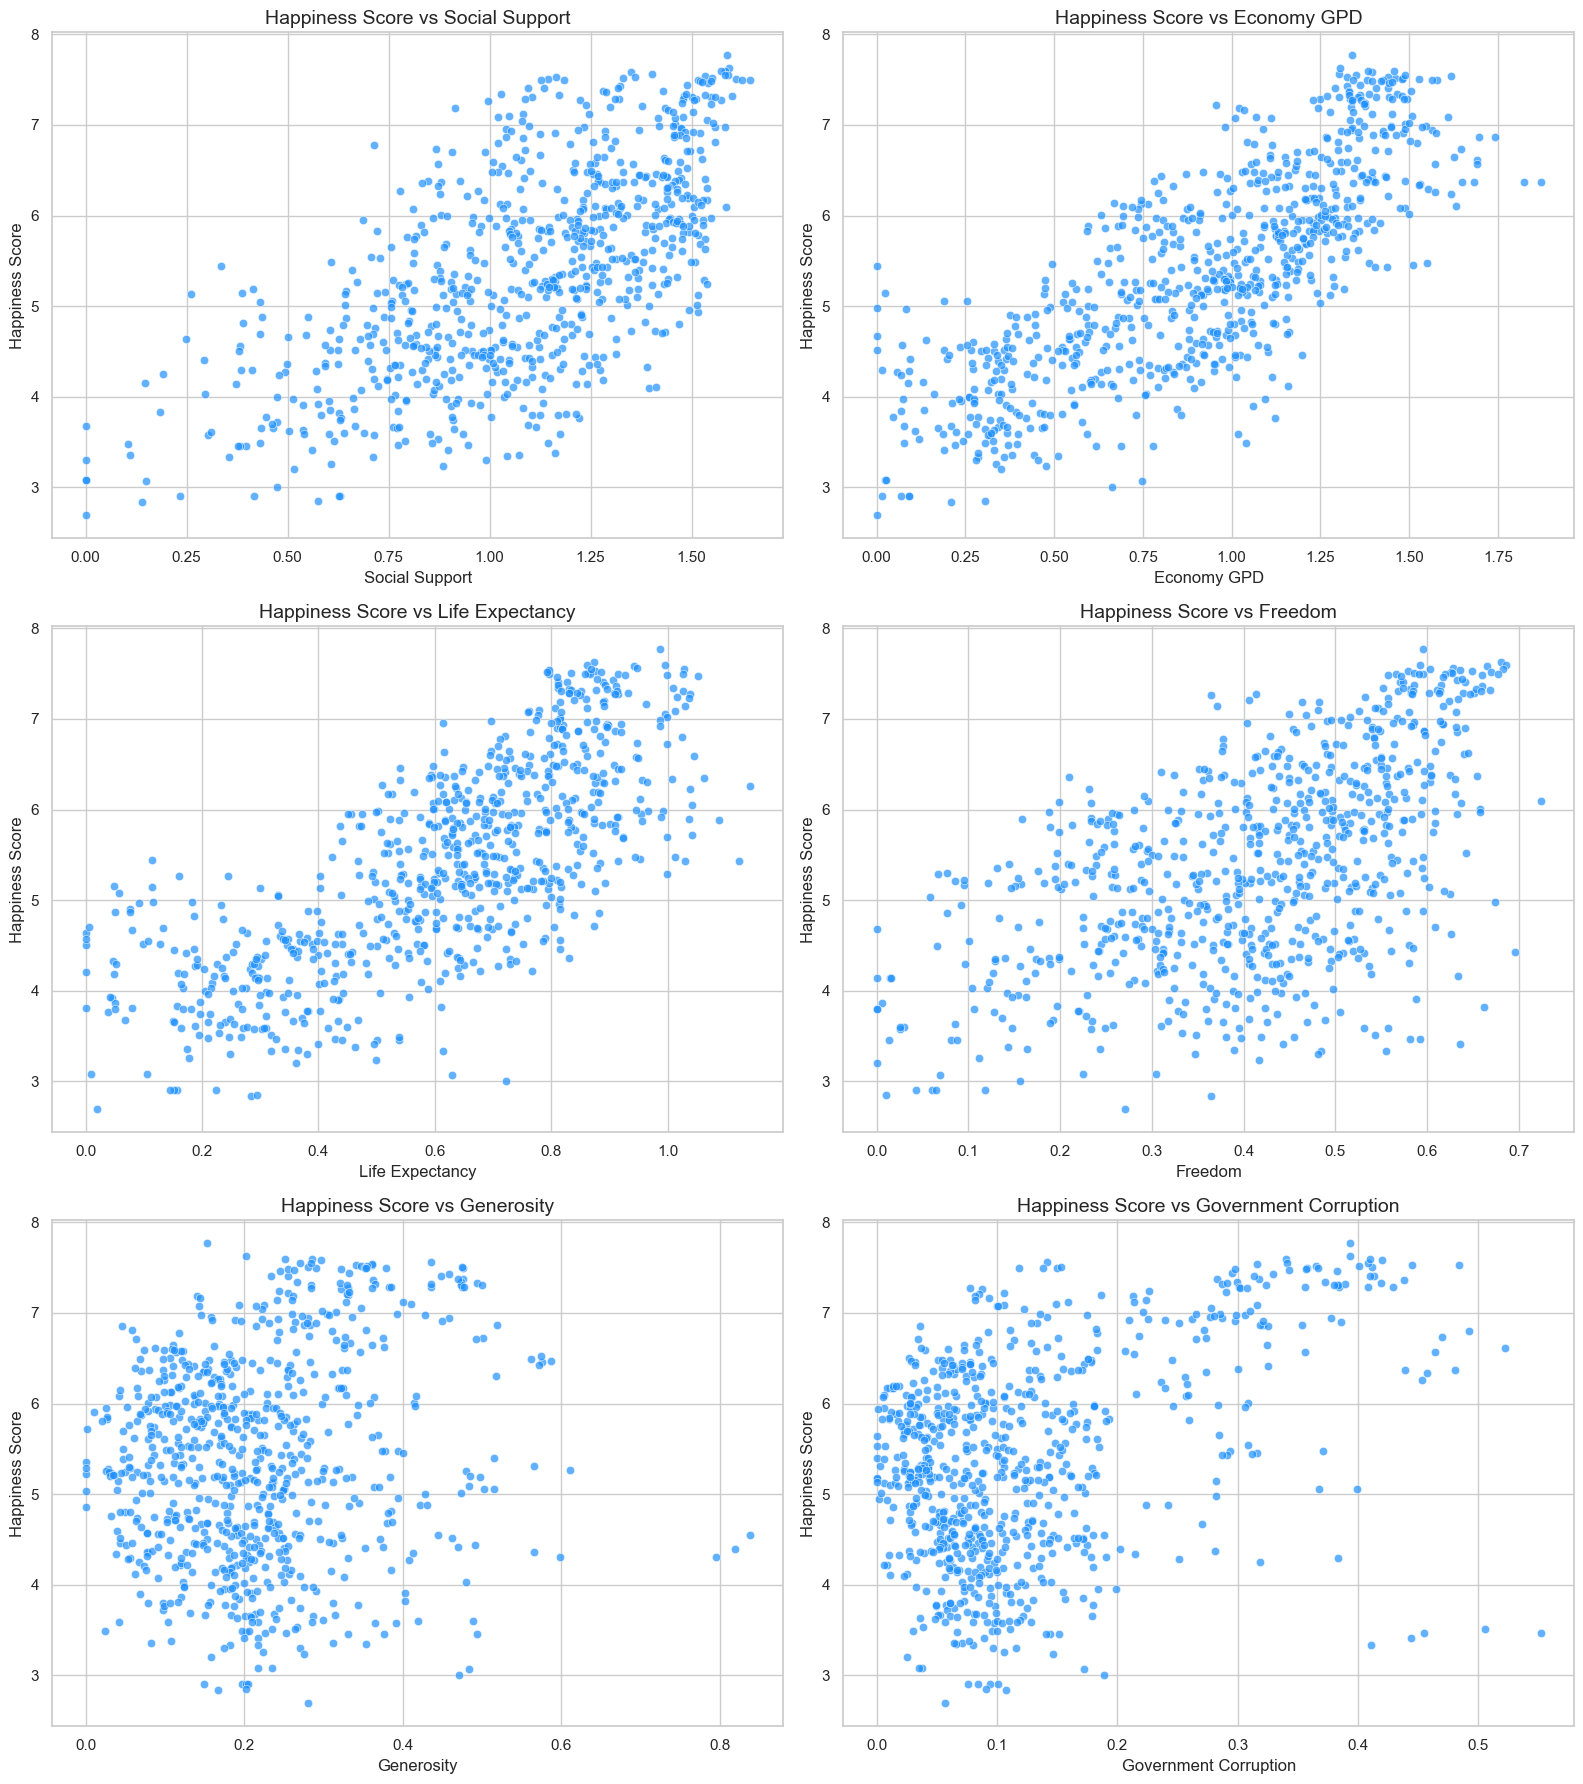

In [110]:
# Scatter plots for Happiness Score vs key variables
key_variables = [
    "Social Support",
    "Economy GPD",
    "Life Expectancy",
    "Freedom",
    "Generosity",
    "Government Corruption"
]

# Set up the plot grid
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(16, 18))
axes = axes.flatten()

# Create scatter plots
for i, var in enumerate(key_variables):
    sns.scatterplot(x=data[var], y=data["Happiness Score"], ax=axes[i], color="dodgerblue", alpha=0.7)
    axes[i].set_title(f"Happiness Score vs {var}", fontsize=14)
    axes[i].set_xlabel(var, fontsize=12)
    axes[i].set_ylabel("Happiness Score", fontsize=12)

plt.tight_layout()
plt.show()


In [53]:
print(data.columns)


Index(['Social Support', 'Happiness Score', 'Happiness Rank', 'Year',
       'Country', 'Life Expectancy', 'Generosity', 'Economy GPD',
       'Government Corruption', 'Freedom', 'Region'],
      dtype='object')


In [55]:
import pandas as pd

# Load the dataset
file_path = 'Data_Dashboard.csv'  # Adjust the path if necessary
data = pd.read_csv(file_path)

# Check for null or missing values in the dataset
null_counts = data.isnull().sum()

print(null_counts)


Social Support           0
Happiness Score          0
Happiness Rank           0
Year                     0
Country                  0
Life Expectancy          0
Generosity               0
Economy GPD              0
Government Corruption    0
Freedom                  0
Region                   0
dtype: int64


In [61]:
import pandas as pd

# Charger les données
data = pd.read_csv('Data_Dashboard.csv')

# Afficher les premières lignes et les noms des colonnes
print(data.columns)
print(data.head())


Index(['Social Support', 'Happiness Score', 'Happiness Rank', 'Year',
       'Country', 'Life Expectancy', 'Generosity', 'Economy GPD',
       'Government Corruption', 'Freedom', 'Region'],
      dtype='object')
   Social Support  Happiness Score  Happiness Rank  Year      Country  \
0         1.34951            7.587               1  2015  Switzerland   
1         1.40223            7.561               2  2015      Iceland   
2         1.36058            7.527               3  2015      Denmark   
3         1.33095            7.522               4  2015       Norway   
4         1.32261            7.427               5  2015       Canada   

   Life Expectancy  Generosity  Economy GPD  Government Corruption  Freedom  \
0          0.94143     0.29678      1.39651                0.41978  0.66557   
1          0.94784     0.43630      1.30232                0.14145  0.62877   
2          0.87464     0.34139      1.32548                0.48357  0.64938   
3          0.88521     0.34699   

In [62]:
# Assuming filtered_data is your DataFrame and happiness_score is one of the columns
numeric_cols = ['Happiness Score', 'Social Support', 'Life Expectancy', 'Generosity', 
                'Economy GPD', 'Government Corruption', 'Freedom']

# Compute the correlation matrix
correlation_matrix = filtered_data[numeric_cols].corr()

# Extract the correlation with 'Happiness Score' (excluding itself)
happiness_correlation = correlation_matrix['Happiness Score'].drop('Happiness Score')

# Print the correlation values
print(happiness_correlation)


Social Support           0.651246
Life Expectancy          0.742843
Generosity               0.138142
Economy GPD              0.789719
Government Corruption    0.398418
Freedom                  0.553365
Name: Happiness Score, dtype: float64
